In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(0)

In [2]:
import tensorflow_probability.substrates.jax as tfp
import flax.linen as nn
import jax
import jax.numpy as jnp
import optax
from functools import partial
import seaborn as sns
import tensorflow as tf

dist = tfp.distributions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from dataloader import *
from retrain_fun import *
import datetime
import scipy.stats as st
import random
random.seed(0)
np.random.seed(0)
jax.random.PRNGKey(0)
os.environ["XLA_FLAGS"] = "--xla_gpu_deterministic_reductions --xla_gpu_autotune_level=2"
os.environ['TF_CUDNN_DETERMINISTIC']='1'


2023-07-15 21:42:30.917735: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_aggregated, houses = data_preprocess(only_positive=True)

In [4]:
train_list= [[2361, 7719, 9019, 2335, 7951]]
test_list= [[4373, 7901, 3456, 3538, 2818]]
pool_list=[]
for i in range(len(train_list)):
    pool = [j for j in houses if j not in train_list[i]+test_list[i]]
    pool_list.append(pool)

In [5]:
data_aggregated

,clotheswasher1,dishwasher1,air1,refrigerator1,furnace1,dataid,localminute,aggr
2407,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:00:00-06,0.132
2408,0.000,0.001,0.004,0.120,0.006,3538,2018-01-01 00:01:00-06,0.131
2409,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:02:00-06,0.132
2410,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:03:00-06,0.132
2411,0.000,0.001,0.005,0.119,0.006,3538,2018-01-01 00:04:00-06,0.131
...,...,...,...,...,...,...,...,...
13100534,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:26:00-06,0.010
13100535,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:27:00-06,0.010
13100536,0.002,0.001,0.000,0.011,0.003,7951,2018-02-07 15:28:00-06,0.017
13100537,0.002,0.000,0.000,0.004,0.003,7951,2018-02-07 15:29:00-06,0.009


In [6]:
pool_list

[[5746, 8565, 9278, 8156, 8386, 9160, 661, 1642, 7536, 7800]]

In [7]:
len(pool_list[0])

10

Train Set No: 1
Iteration No:  0


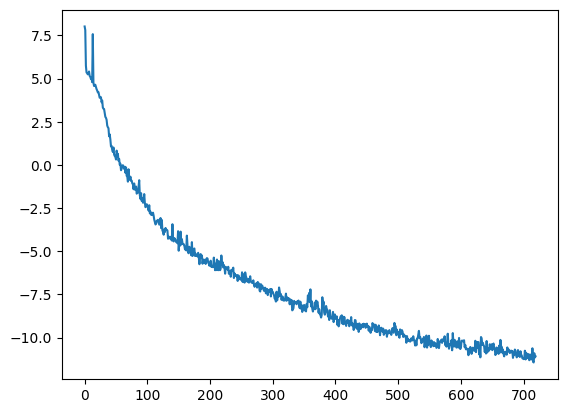

RMSE : [838.97186   65.4115   283.74158   52.868984 462.44693 ] MAE  : [328.1383    41.170593 121.62969   22.690022 248.00345 ] NLL : 6362.65625
[array([13.50549272, 17.89925847, 36.43992551, 30.85964816, 56.3204859 ]), array([10.11946451, 25.9236179 , 88.39056295, 84.92569243, 42.62619178]), array([ 60.41320099,  36.37737317, 111.91224084,  81.07524522,
       199.90964971]), array([14.99787805, 19.03588716, 41.47758081, 33.36189121, 50.18485849]), array([2.04060018, 9.19154596, 5.77045856, 3.50101264, 5.78648707]), array([1.62504228, 8.17905322, 4.46117458, 2.77609852, 4.68670433]), array([ 7.49740331, 13.77962133, 12.02146182,  6.87748465, 16.79404475]), array([37.15600451, 35.41283882, 78.05300371, 59.77050487, 99.7470048 ]), array([15.46794499, 16.07816083, 24.73027385, 14.03264226, 41.28900536]), array([ 3.33995439, 10.84165522, 10.3368515 ,  7.61925791, 11.1309125 ])]
[[ 6.  6.  6.  6.  8.]
 [ 5.  8.  9. 10.  6.]
 [10. 10. 10.  9. 10.]
 [ 7.  7.  7.  7.  7.]
 [ 2.  2.  2.  2.  2

/home/dhruv.patel/multiout_tech/rank/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278]


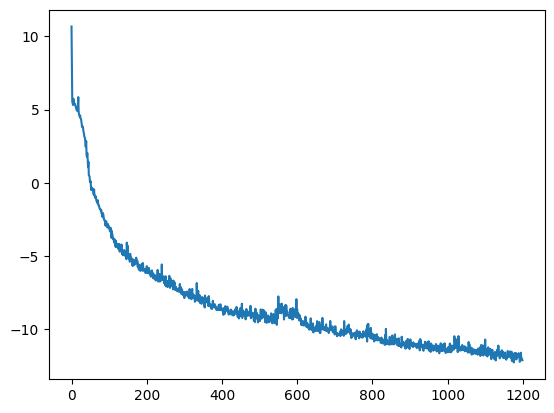

RMSE : [651.47064   63.11932  118.34574  112.265045 320.69913 ] MAE  : [259.63498   40.192894  62.075867  44.703426 154.19086 ] NLL : 5.195313930511475
[array([31.60172198, 18.25971537, 46.19723879, 46.91224253, 89.82038996]), array([ 5.43826111, 23.66719783, 40.6283219 , 40.00355995, 37.2441975 ]), array([26.48994652, 13.31352325, 27.64794165, 23.14174392, 43.21648011]), array([2.01919248, 7.37540321, 4.74948311, 2.56795077, 3.29847878]), array([34.01963068, 12.23443993, 33.14018621, 27.11033471, 54.57408872]), array([ 7.2363536 , 10.7665902 ,  9.33551588,  5.42506781,  9.45266886]), array([24.0599978 , 19.90460896, 36.62474473, 32.66335605, 41.55688066]), array([27.5405549 , 11.08163517, 25.55802111, 14.04268553, 34.71459189]), array([ 7.96624471, 11.26877713, 15.0454822 , 15.35053229, 21.62151898])]
[[8. 7. 9. 9. 9.]
 [2. 9. 8. 8. 5.]
 [6. 6. 5. 5. 7.]
 [1. 1. 1. 1. 1.]
 [9. 5. 6. 6. 8.]
 [3. 2. 2. 2. 2.]
 [5. 8. 7. 7. 6.]
 [7. 3. 4. 3. 4.]
 [4. 4. 3. 4. 3.]]
[42. 32. 29.  5. 34. 11

/home/dhruv.patel/multiout_tech/rank/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746]


2023-07-15 21:51:16.258888: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[111858,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[111858,50,99]{2,1,0}, f32[50,50,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


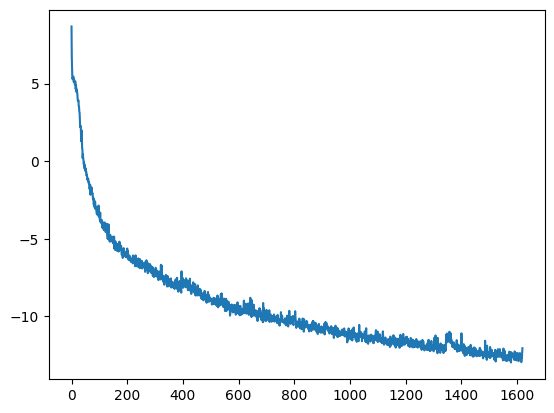

RMSE : [305.84824   59.622173  93.95178   68.11078  147.92096 ] MAE  : [125.51922   36.52274   51.004757  18.392712  57.464596] NLL : 4.547698974609375
[array([24.61367843, 24.2132467 , 40.04419641, 45.33314783, 41.08678205]), array([78.68661018, 19.74623206, 32.39948876, 22.52830433, 43.26141803]), array([2.04065267, 6.64862677, 4.19505015, 2.15944975, 3.39959427]), array([68.04519159, 12.26473268, 26.02448922, 15.42597348, 32.2670266 ]), array([ 3.86155705, 10.17762237,  5.83218354,  2.69142387,  4.36019041]), array([38.50735841, 28.52805586, 38.62906134, 26.6255417 , 41.59200103]), array([43.78991923, 10.62135932, 19.35077067,  4.74692556, 18.30441333]), array([37.99244237, 12.40831623, 20.83213236, 26.48553334, 34.23997889])]
[[3. 7. 8. 8. 6.]
 [8. 6. 6. 5. 8.]
 [1. 1. 1. 1. 1.]
 [7. 4. 5. 4. 4.]
 [2. 2. 2. 2. 2.]
 [5. 8. 7. 7. 7.]
 [6. 3. 3. 3. 3.]
 [4. 5. 4. 6. 5.]]
[32. 33.  5. 24. 10. 34. 18. 24.]
Iteration No:  3


/home/dhruv.patel/multiout_tech/rank/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 1642]


2023-07-15 21:54:04.703620: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[155941,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[155941,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 21:54:05.756226: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[155941,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[155941,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07

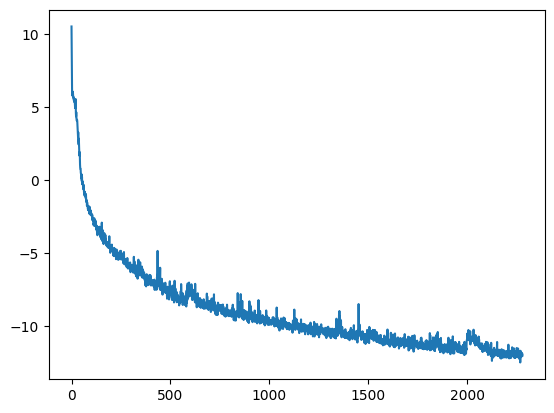

RMSE : [259.65692   54.932518  78.24232   28.70386   77.291245] MAE  : [92.475945  32.406033  42.529476   9.3647375 17.303751 ] NLL : 5.233991622924805
[array([35.06948854, 18.99554176, 43.99483814, 20.07460906, 25.16319265]), array([97.13372513, 20.81003633, 29.44596581, 25.16894806, 25.90150376]), array([2.26108526, 7.16565007, 5.20858811, 4.31073113, 4.5557548 ]), array([30.95736304,  7.88093865,  9.93437808,  2.35363584,  3.72921077]), array([6.27803009, 9.5588217 , 7.02492367, 4.47328893, 4.78978215]), array([43.8003505 ,  8.88821882, 12.40327435,  1.50182665,  2.51199466]), array([37.39166834, 11.16270374, 15.82343413, 13.84563073, 25.89427705])]
[[4. 6. 7. 6. 5.]
 [7. 7. 6. 7. 7.]
 [1. 1. 1. 3. 3.]
 [3. 2. 3. 2. 2.]
 [2. 4. 2. 4. 4.]
 [6. 3. 4. 1. 1.]
 [5. 5. 5. 5. 6.]]
[28. 34.  9. 12. 16. 15. 26.]
Iteration No:  4


/home/dhruv.patel/multiout_tech/rank/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 1642 8156]


2023-07-15 21:56:39.315866: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[214393,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[214393,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 21:56:40.448529: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[214393,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[214393,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 21:

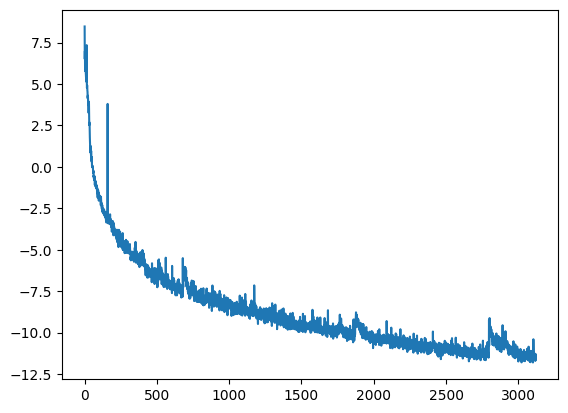

RMSE : [231.66862   55.110344  82.193855  30.208368  88.367004] MAE  : [82.849785 31.550327 44.319122  8.295383 21.99656 ] NLL : 4.404228687286377
[array([38.03209904, 21.8346755 , 40.52862202, 24.05473075, 38.51404174]), array([2.20068828, 8.2035431 , 5.52252612, 6.18698659, 4.97722227]), array([20.73517095,  7.72346755,  8.6615334 ,  1.28568302,  1.82976856]), array([ 6.17168567, 10.08124151,  7.45079614,  4.61629691,  4.50599866]), array([42.52142324,  9.49708423, 12.37608363,  1.27537938,  3.57592614]), array([34.83102462, 11.86694486, 15.60729185, 11.77820227, 29.12107549])]
[[5. 6. 6. 6. 6.]
 [1. 2. 1. 4. 4.]
 [3. 1. 3. 2. 1.]
 [2. 4. 2. 3. 3.]
 [6. 3. 4. 1. 2.]
 [4. 5. 5. 5. 5.]]
[29. 12. 10. 14. 16. 24.]
Iteration No:  5


/home/dhruv.patel/multiout_tech/rank/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 1642 8156 8565]


2023-07-15 21:59:02.682963: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[270346,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[270346,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 21:59:04.060857: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[270346,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[270346,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 21:

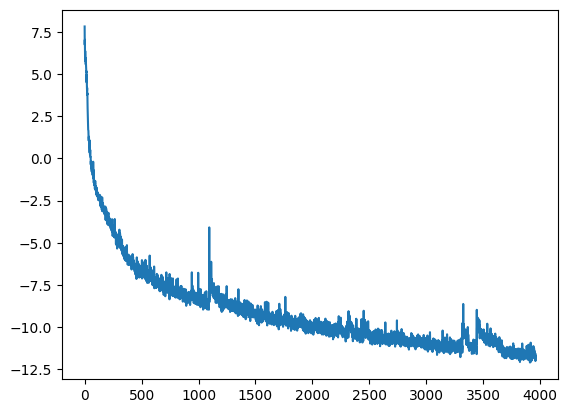

RMSE : [176.67853   52.61642   69.627205  26.40162   64.26765 ] MAE  : [64.329025  29.680033  36.807724   7.1994476 12.092485 ] NLL : 7.600168704986572
[array([1.83900883, 6.68113533, 4.37027954, 4.52841962, 4.05209531]), array([13.63147665,  6.50930002,  7.02727514,  0.74301574,  0.94769965]), array([5.15213629, 9.92503629, 7.4654098 , 5.14069535, 5.2530283 ]), array([25.93850674,  8.06660345,  9.82737175,  1.63978869,  2.19644449]), array([20.15946959,  9.10967079, 10.05001671,  5.12557988, 10.96424894])]
[[1. 2. 1. 3. 3.]
 [3. 1. 2. 1. 1.]
 [2. 5. 3. 5. 4.]
 [5. 3. 4. 2. 2.]
 [4. 4. 5. 4. 5.]]
[10.  8. 19. 16. 22.]
Iteration No:  6


/home/dhruv.patel/multiout_tech/rank/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 1642 8156 8565 7800]


2023-07-15 22:01:19.422213: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[332083,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[332083,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 22:01:21.084206: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[332083,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[332083,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 22:

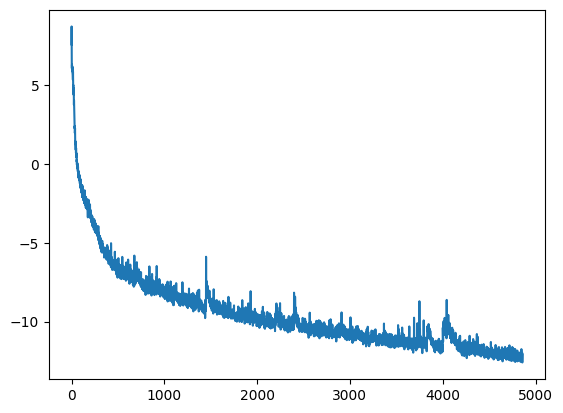

RMSE : [148.11389   53.53165   71.75309   21.191828  61.42713 ] MAE  : [52.409565  29.98344   37.258316   4.8736677 10.825102 ] NLL : 36.89279556274414
[array([1.11293903, 5.46718775, 3.89621653, 2.92120784, 2.89170579]), array([13.32476658,  6.73152401,  8.1983458 ,  1.60992159,  2.56707403]), array([ 3.70743095, 10.76550484,  8.36607484,  5.32204927,  5.68041149]), array([14.64740947,  9.18485922, 12.10321649,  2.74233119,  5.00972256])]
[[1. 1. 1. 3. 2.]
 [3. 2. 2. 1. 1.]
 [2. 4. 3. 4. 4.]
 [4. 3. 4. 2. 3.]]
[ 8.  9. 17. 16.]
Iteration No:  7


/home/dhruv.patel/multiout_tech/rank/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 1642 8156 8565 7800  661]


2023-07-15 22:03:24.937508: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[399774,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[399774,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 22:03:26.905601: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[399774,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[399774,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 22:

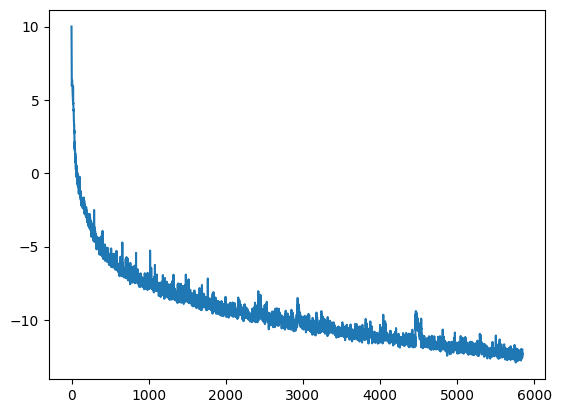

RMSE : [137.72182   52.282032  73.55637   19.580805  60.837566] MAE  : [46.990467  28.572163  37.393154   4.0638294 10.938241 ] NLL : 8.91703987121582
[array([1.01450235, 6.48603533, 4.64710104, 6.74788965, 5.58774027]), array([16.44735839,  6.08406642,  7.99789265,  1.67585602,  3.55131355]), array([17.24327719,  8.24411437, 11.14508493,  3.26882372,  3.77035977])]
[[1. 2. 1. 3. 3.]
 [2. 1. 2. 1. 1.]
 [3. 3. 3. 2. 2.]]
[10.  7. 13.]
Iteration No:  8


/home/dhruv.patel/multiout_tech/rank/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 1642 8156 8565 7800  661 7536]


2023-07-15 22:05:21.795794: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[474218,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[474218,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 22:05:24.066483: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[474218,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[474218,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


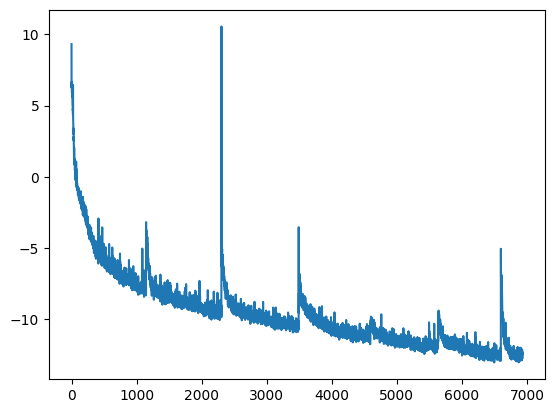

RMSE : [128.13382   52.41955   65.30125   19.354113  57.601635] MAE  : [43.184155  29.007715  31.786257   4.4910164  9.2133   ] NLL : 5.962827205657959
[array([0.75655477, 6.535561  , 4.24733053, 7.38186159, 5.78106955]), array([21.43877226,  6.14747267,  9.43318859,  1.627119  ,  2.32580456])]
[[1. 2. 1. 2. 2.]
 [2. 1. 2. 1. 1.]]
[8. 7.]
Iteration No:  9


/home/dhruv.patel/multiout_tech/rank/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 1642 8156 8565 7800  661 7536 8386]


2023-07-15 22:07:14.695827: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[555585,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[555585,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-15 22:07:17.393005: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[555585,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[555585,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


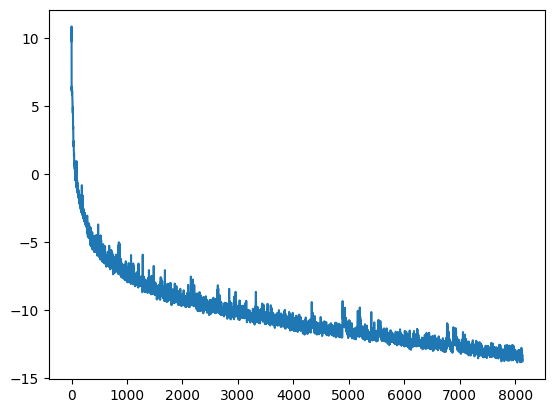

RMSE : [131.45493   50.550148  67.084724  21.072266  59.026707] MAE  : [44.54548   26.698019  31.12537    4.2331676 10.449853 ] NLL : 15.647099494934082
[array([31.30665238,  7.80499588, 17.26329188,  0.7907818 ,  1.5343946 ])]
[[1. 1. 1. 1. 1.]]
[5.]


In [8]:
total_rmse=[]
houseids=[]
for i in range(len(train_list)):
    # print(len(train_list))
    print("Train Set No:", i+1)
    train_houses = train_list[i]
    test_houses = test_list[i]
    pool_houses = pool_list[i]
    #change 1 - removing train test var from function
    train = data_aggregated[data_aggregated["dataid"].isin(train_houses)] 
    test = data_aggregated[data_aggregated["dataid"].isin(test_houses)]

    maes = []
    rmse_iter=[]
    houses=[]
    rank_array =[]
    uncert_array = []
    start= ["2018-03-01 00:00:00-06","2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-26 00:00:00-06", "2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06","2018-04-21 00:00:00-06"]
    end= ["2018-03-10 23:59:00-06","2018-03-15 23:59:00-06","2018-03-20 23:59:00-06","2018-03-25 23:59:00-06","2018-03-31 23:59:00-06","2018-04-05 23:59:00-06", "2018-04-10 23:59:00-06", "2018-04-15 23:59:00-06", "2018-04-20 23:59:00-06", "2018-04-25 23:59:00-06"]
    dates = ["2018-03-01 00:00:00-06","2018-03-06 00:00:00-06", "2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-27 00:00:00-06","2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06"]
    for j in range(len(start)):
        # print(len(start))
        print("Iteration No: ",j)
        if(j==0):
            house, houseid,rmsee, maee, train, test, rank,un = retrain(0, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated)
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
            rank_array.append(rank)
            uncert_array.append(un)
        elif(j==10):
            house, houseid,rmsee, maee, train, test, rank, un= retrain(house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated)
            rmse_iter.append(rmsee)
            maes.append(maee)
            rank_array.append(rank)
            uncert_array.append(un)
        else:
            house, houseid,rmsee, maee, train, test, rank, un= retrain(house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated)
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
            rank_array.append(rank)
            uncert_array.append(un)
    total_rmse.append(rmse_iter)
    houseids.append(houses)


In [9]:
houseids

[[9278, 5746, 1642, 8156, 8565, 7800, 661, 7536, 8386, 9160]]

In [10]:
rmse_iter = np.array(rmse_iter)
rmse_iter

array([[838.97186 ,  65.4115  , 283.74158 ,  52.868984, 462.44693 ],
       [651.47064 ,  63.11932 , 118.34574 , 112.265045, 320.69913 ],
       [305.84824 ,  59.622173,  93.95178 ,  68.11078 , 147.92096 ],
       [259.65692 ,  54.932518,  78.24232 ,  28.70386 ,  77.291245],
       [231.66862 ,  55.110344,  82.193855,  30.208368,  88.367004],
       [176.67853 ,  52.61642 ,  69.627205,  26.40162 ,  64.26765 ],
       [148.11389 ,  53.53165 ,  71.75309 ,  21.191828,  61.42713 ],
       [137.72182 ,  52.282032,  73.55637 ,  19.580805,  60.837566],
       [128.13382 ,  52.41955 ,  65.30125 ,  19.354113,  57.601635],
       [131.45493 ,  50.550148,  67.084724,  21.072266,  59.026707]],
      dtype=float32)

In [11]:
maes = np.array(maes) 

In [12]:
appliances = ['air', 'refrigerator' , 'furnace', 'clothewasher', 'dishwasher']
for i in range(5):
    d = pd.DataFrame(rmse_iter[:,i])
    d1 = pd.DataFrame(maes[:,i])
    if not os.path.exists(f'{appliances[i]}'):
        os.mkdir(f'{appliances[i]}')
    # Save the DataFrame to a CSV file
    d.to_csv(os.path.join(f'{appliances[i]}', "new_RMSE.csv"), index=False)
    d1.to_csv(os.path.join(f'{appliances[i]}', "new_MAE.csv"), index=False)
    
house_df= pd.DataFrame(houseids)
house_df.to_csv("new_houseids.csv")


In [13]:
d = pd.DataFrame(rmse_iter)
d.to_csv("new_errors.csv")

In [14]:
house_df= pd.DataFrame(houseids)
house_df.to_csv("new_houseids.csv")

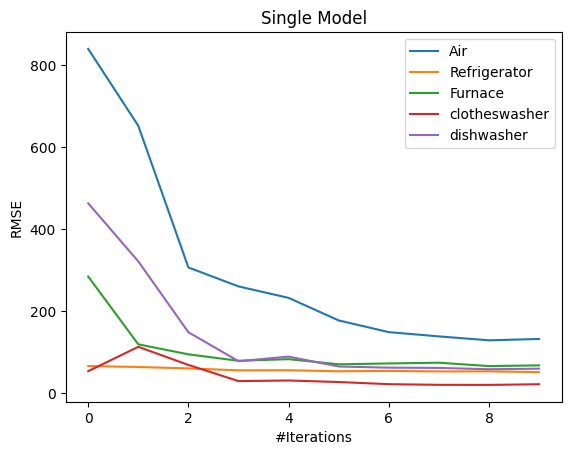

In [15]:
for i in range(5):
    plt.plot(d[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(['Air', 'Refrigerator', 'Furnace', 'clotheswasher', 'dishwasher'])



In [16]:
import numpy as np
import matplotlib.pyplot as plt
scaled_total_rmse =[]
for i in range(5):
    a = np.array(d[i])
    ans = (a-a.min())/(a.max()-a.min())
    scaled_total_rmse.append(ans)

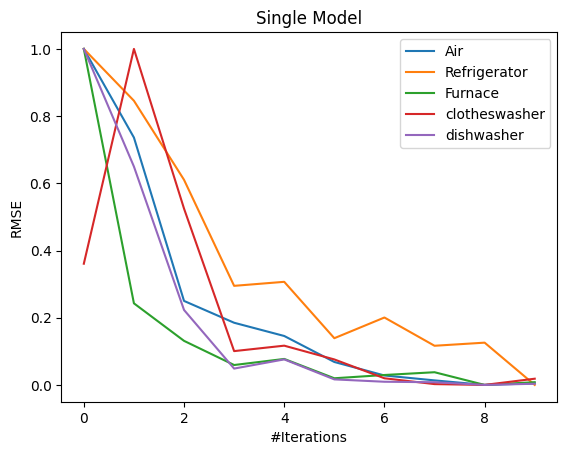

In [17]:
for i in range(5):
    plt.plot(scaled_total_rmse[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(['Air', 'Refrigerator', 'Furnace', 'clotheswasher', 'dishwasher'])

In [18]:
maes_df = pd.DataFrame(maes)


In [19]:
maes_df

,0,1,2,3,4
0,328.138306,41.170593,121.629692,22.690022,248.003448
1,259.634979,40.192894,62.075867,44.703426,154.190857
2,125.519218,36.522739,51.004757,18.392712,57.464596
3,92.475945,32.406033,42.529476,9.364738,17.303751
4,82.849785,31.550327,44.319122,8.295383,21.996559
5,64.329025,29.680033,36.807724,7.199448,12.092485
6,52.409565,29.983440,37.258316,4.873668,10.825102
7,46.990467,28.572163,37.393154,4.063829,10.938241
8,43.184155,29.007715,31.786257,4.491016,9.213300
9,44.545479,26.698019,31.125370,4.233168,10.449853


In [20]:
print(data_aggregated['air1'].mean()*1000, data_aggregated['refrigerator1'].mean()*1000, data_aggregated['furnace1'].mean()*1000, data_aggregated['clotheswasher1'].mean()*1000, data_aggregated['dishwasher1'].mean()*1000)

387.9863080087092 145.74786692064612 179.39920680753877 26.982003007108773 16.52270251359823


In [21]:
rank_array

[array([[ 6.,  6.,  6.,  6.,  8.],
        [ 5.,  8.,  9., 10.,  6.],
        [10., 10., 10.,  9., 10.],
        [ 7.,  7.,  7.,  7.,  7.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 4.,  4.,  4.,  3.,  4.],
        [ 9.,  9.,  8.,  8.,  9.],
        [ 8.,  5.,  5.,  5.,  5.],
        [ 3.,  3.,  3.,  4.,  3.]]),
 array([[8., 7., 9., 9., 9.],
        [2., 9., 8., 8., 5.],
        [6., 6., 5., 5., 7.],
        [1., 1., 1., 1., 1.],
        [9., 5., 6., 6., 8.],
        [3., 2., 2., 2., 2.],
        [5., 8., 7., 7., 6.],
        [7., 3., 4., 3., 4.],
        [4., 4., 3., 4., 3.]]),
 array([[3., 7., 8., 8., 6.],
        [8., 6., 6., 5., 8.],
        [1., 1., 1., 1., 1.],
        [7., 4., 5., 4., 4.],
        [2., 2., 2., 2., 2.],
        [5., 8., 7., 7., 7.],
        [6., 3., 3., 3., 3.],
        [4., 5., 4., 6., 5.]]),
 array([[4., 6., 7., 6., 5.],
        [7., 7., 6., 7., 7.],
        [1., 1., 1., 3., 3.],
        [3., 2., 3., 2., 2.],
        [2., 4

In [22]:
d = pd.DataFrame(rank_array)
d.to_csv('ranks.csv')

/home/dhruv.patel/anaconda3/envs/active_NILM/lib/python3.9/site-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [23]:
d

,0
0,"[[6.0, 6.0, 6.0, 6.0, 8.0], [5.0, 8.0, 9.0, 10..."
1,"[[8.0, 7.0, 9.0, 9.0, 9.0], [2.0, 9.0, 8.0, 8...."
2,"[[3.0, 7.0, 8.0, 8.0, 6.0], [8.0, 6.0, 6.0, 5...."
3,"[[4.0, 6.0, 7.0, 6.0, 5.0], [7.0, 7.0, 6.0, 7...."
4,"[[5.0, 6.0, 6.0, 6.0, 6.0], [1.0, 2.0, 1.0, 4...."
5,"[[1.0, 2.0, 1.0, 3.0, 3.0], [3.0, 1.0, 2.0, 1...."
6,"[[1.0, 1.0, 1.0, 3.0, 2.0], [3.0, 2.0, 2.0, 1...."
7,"[[1.0, 2.0, 1.0, 3.0, 3.0], [2.0, 1.0, 2.0, 1...."
8,"[[1.0, 2.0, 1.0, 2.0, 2.0], [2.0, 1.0, 2.0, 1...."
9,"[[1.0, 1.0, 1.0, 1.0, 1.0]]"
